<a href="https://colab.research.google.com/github/GiangTTran/SparseRandomModeDecomposition/blob/main/examples/gravitational.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gravitational Example

Visualize and denoise the gravitational waves signal produced by event GW150914.

This is similar to the example shown in Section 3.6 of the [SRMD paper](https://arxiv.org/abs/2204.06108). Unlike the paper, we solve the BPDN problem in an effort to minimize the complexity of the code. Note BPDN and LASSO have equivalent solutions for some hyperparameters sigma and tau. 

In [1]:
# download module from github
%pip install git+https://github.com/GiangTTran/SparseRandomModeDecomposition.git#egg=srmdpy

  Cloning https://github.com/GiangTTran/SparseRandomModeDecomposition.git to /tmp/pip-install-t31jzap8/srmdpy_ee8c0d6fc83a49eeb81dedf0a96afc6c
  Running command git clone -q https://github.com/GiangTTran/SparseRandomModeDecomposition.git /tmp/pip-install-t31jzap8/srmdpy_ee8c0d6fc83a49eeb81dedf0a96afc6c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for srmdpy: filename=srmdpy-0.0.1-py3-none-any.whl size=11171 sha256=1a3f653ebe52d2dd713ec4ce4e62b013633f5cbae2ece678be16f61411fd1059
  Stored in directory: /tmp/pip-ephem-wheel-cache-to0iitv9/wheels/5b/89/54/7798db729d46561a5ecaef26ca37c2f67537ef21a8c732e2d5
Successfully built srmdpy


Download Gravitational Files

In [2]:
!wget https://github.com/GiangTTran/SparseRandomModeDecomposition/raw/main/data/gravitational.zip
!unzip gravitational.zip

--2022-05-03 20:27:15--  https://github.com/GiangTTran/SparseRandomModeDecomposition/raw/main/data/gravitational.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GiangTTran/SparseRandomModeDecomposition/main/data/gravitational.zip [following]
--2022-05-03 20:27:15--  https://raw.githubusercontent.com/GiangTTran/SparseRandomModeDecomposition/main/data/gravitational.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115384 (113K) [application/zip]
Saving to: ‘gravitational.zip’

gravitational.zip   100%[===================>] 112.68K  --.-KB/s    in 0.002s  

2022-05-03 20:27:15 (52.7 MB/s) - ‘

Import Files as numpy arrays

In [3]:
import numpy as np

# File Paths
H_filepath = '/content/observed_gravitational_data.txt'
N_filepath = '/content/numerical_gravitational_data.txt'

# Load files
htxt = np.loadtxt(H_filepath) #LIGO Hanford data
htime, hdata = (htxt[:,0], htxt[:,1])
nrtxt = np.loadtxt(N_filepath) #numerical relativity data
ntime, ndata = (nrtxt[:,0], nrtxt[:,1])

# normalize
hdatamax = abs(max(hdata))
hdata /= hdatamax
ndata /= hdatamax

# downsample
fs = 16384 # original samplerate
downsample = 4 # Only use 1/downsample as many samples

def equal_downsample(data):
    return data[::downsample]

hdata, htime, ndata, ntime = map(equal_downsample, [hdata, htime, ndata, ntime])

Perform SRMD, where only one mode is specified

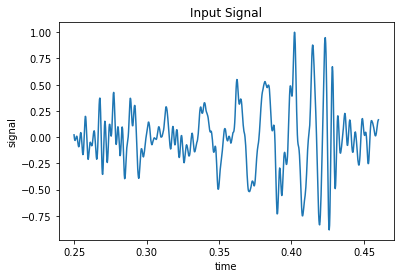

INFO:SRMD:After thresholding, there are 22 nonzero features out of 17220 features or 0.128%


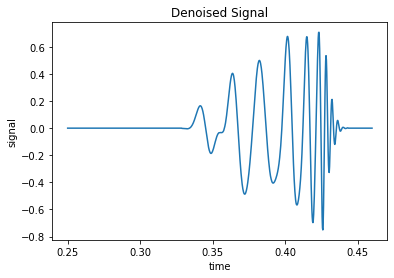

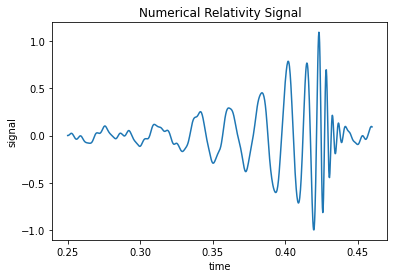

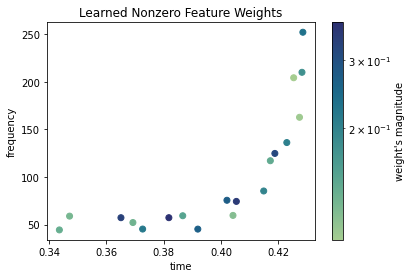

In [4]:
from srmdpy import SRMD
import srmdpy.visualization as plot

plot.signal(htime, hdata, title='Input Signal')

# Separate the modes
kwargs = {'N_features': 20*len(htime), 'r':0.01, 'w':0.01, 'threshold':0.95,
          'seed':314, 'return_features':True, 'n_modes':1, 'verbosity':1}
denoised_data, (tau, frq, phs), weights, labels = SRMD(hdata, htime, **kwargs)

# Compare the denoised signal to the numerical relativity signal
print('')
plot.signal(htime, denoised_data, title='Denoised Signal')
plot.signal(ntime, ndata, title='Numerical Relativity Signal')

# Plot the learned weights in time frequency space
print('')
plot.weights(tau, frq, weights, labels,
             title='Learned Nonzero Feature Weights')